In [13]:
import pandas as pd
import numpy as np
import missingno as msno
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()
import plotly.io as pio
# pio.renderers.default = 'notebook'
pio.renderers.default = "notebook_connected"

# bank acc fraud

In [14]:
df_raw = pd.read_csv('Base.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [15]:
df_raw

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0                0     0.3               0.986506                         -1   
1                0     0.8               0.617426                         -1   
2                0     0.8               0.996707                          9   
3                0     0.6               0.475100                         11   
4                0     0.9               0.842307                         -1   
...            ...     ...                    ...                        ...   
999995           0     0.8               0.124690                         -1   
999996           0     0.9               0.824544                         -1   
999997           0     0.8               0.140891                         -1   
999998           0     0.9               0.002480                         52   
999999           0     0.6               0.993391                         -1   

        current_address_months_count  customer_age  days_since_request  \
0                                 25            40            0.006735   
1                                 89            20            0.010095   
2                                 14            40            0.012316   
3                                 14            30            0.006991   
4                                 29            40            5.742626   
...                              ...           ...                 ...   
999995                           143            30            0.051348   
999996                           193            30            0.009591   
999997                           202            10            0.059287   
999998                             3            30            0.023357   
999999                           174            30            0.020422   

        intended_balcon_amount payment_type  zip_count_4w   velocity_6h  \
0                   102.453711           AA          1059  13096.035018   
1                    -0.849551           AD          1658   9223.283431   
2                    -1.490386           AB          1095   4471.472149   
3                    -1.863101           AB          3483  14431.993621   
4                    47.152498           AA          2339   7601.511579   
...                        ...          ...           ...           ...   
999995               -0.826239           AB           530   6732.602414   
999996                0.008307           AC           408   1574.293294   
999997               50.609995           AA           749   1258.864938   
999998               -1.313387           AB           707   7048.137128   
999999               14.942456           AA           655   3737.076479   

        velocity_24h  velocity_4w  bank_branch_count_8w  \
0        7850.955007  6742.080561                     5   
1        5745.251481  5941.664859                     3   
2        5471.988958  5992.555113                    15   
3        6755.344479  5970.336831                    11   
4        5124.046930  5940.734212                     1   
...              ...          ...                   ...   
999995   3010.048099  3095.754245                    42   
999996   2716.495767  4286.089050                     0   
999997   3601.322892  3103.891664                     2   
999998   6521.395012  3068.265084                     7   
999999   3135.788094  3051.003293                    14   

        date_of_birth_distinct_emails_4w employment_status  credit_risk_score  \
0                                      5                CB                163   
1                                     18                CA                154   
2                                     11                CA                 89   
3                                     13                CA                 90   
4                                      6                CA                 91   
...                                  ...               ...    

# EDA

In [16]:
col_list = [
            'fraud_bool',
            # -- applicant's background and application info -- #
            'income',
            'name_email_similarity',
            'prev_address_months_count',
            'current_address_months_count',
            'customer_age',
            'days_since_request',
            'intended_balcon_amount',
            'payment_type',
            'zip_count_4w',
            'bank_branch_count_8w',
            'date_of_birth_distinct_emails_4w',
            'employment_status',
            'credit_risk_score',
            'email_is_free',
            'housing_status',
            'phone_home_valid',
            'phone_mobile_valid',
            'bank_months_count', 
            'has_other_cards',
            'proposed_credit_limit',
            'foreign_request',
            'source',
            'device_os',
            'device_distinct_emails_8w',
#             'device_fraud_count'
                ]

df = df_raw[col_list]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  bank_branch_count_8w              1000000 non-null  int64  
 11  date_of_birth_distinct_emails_4w  1000

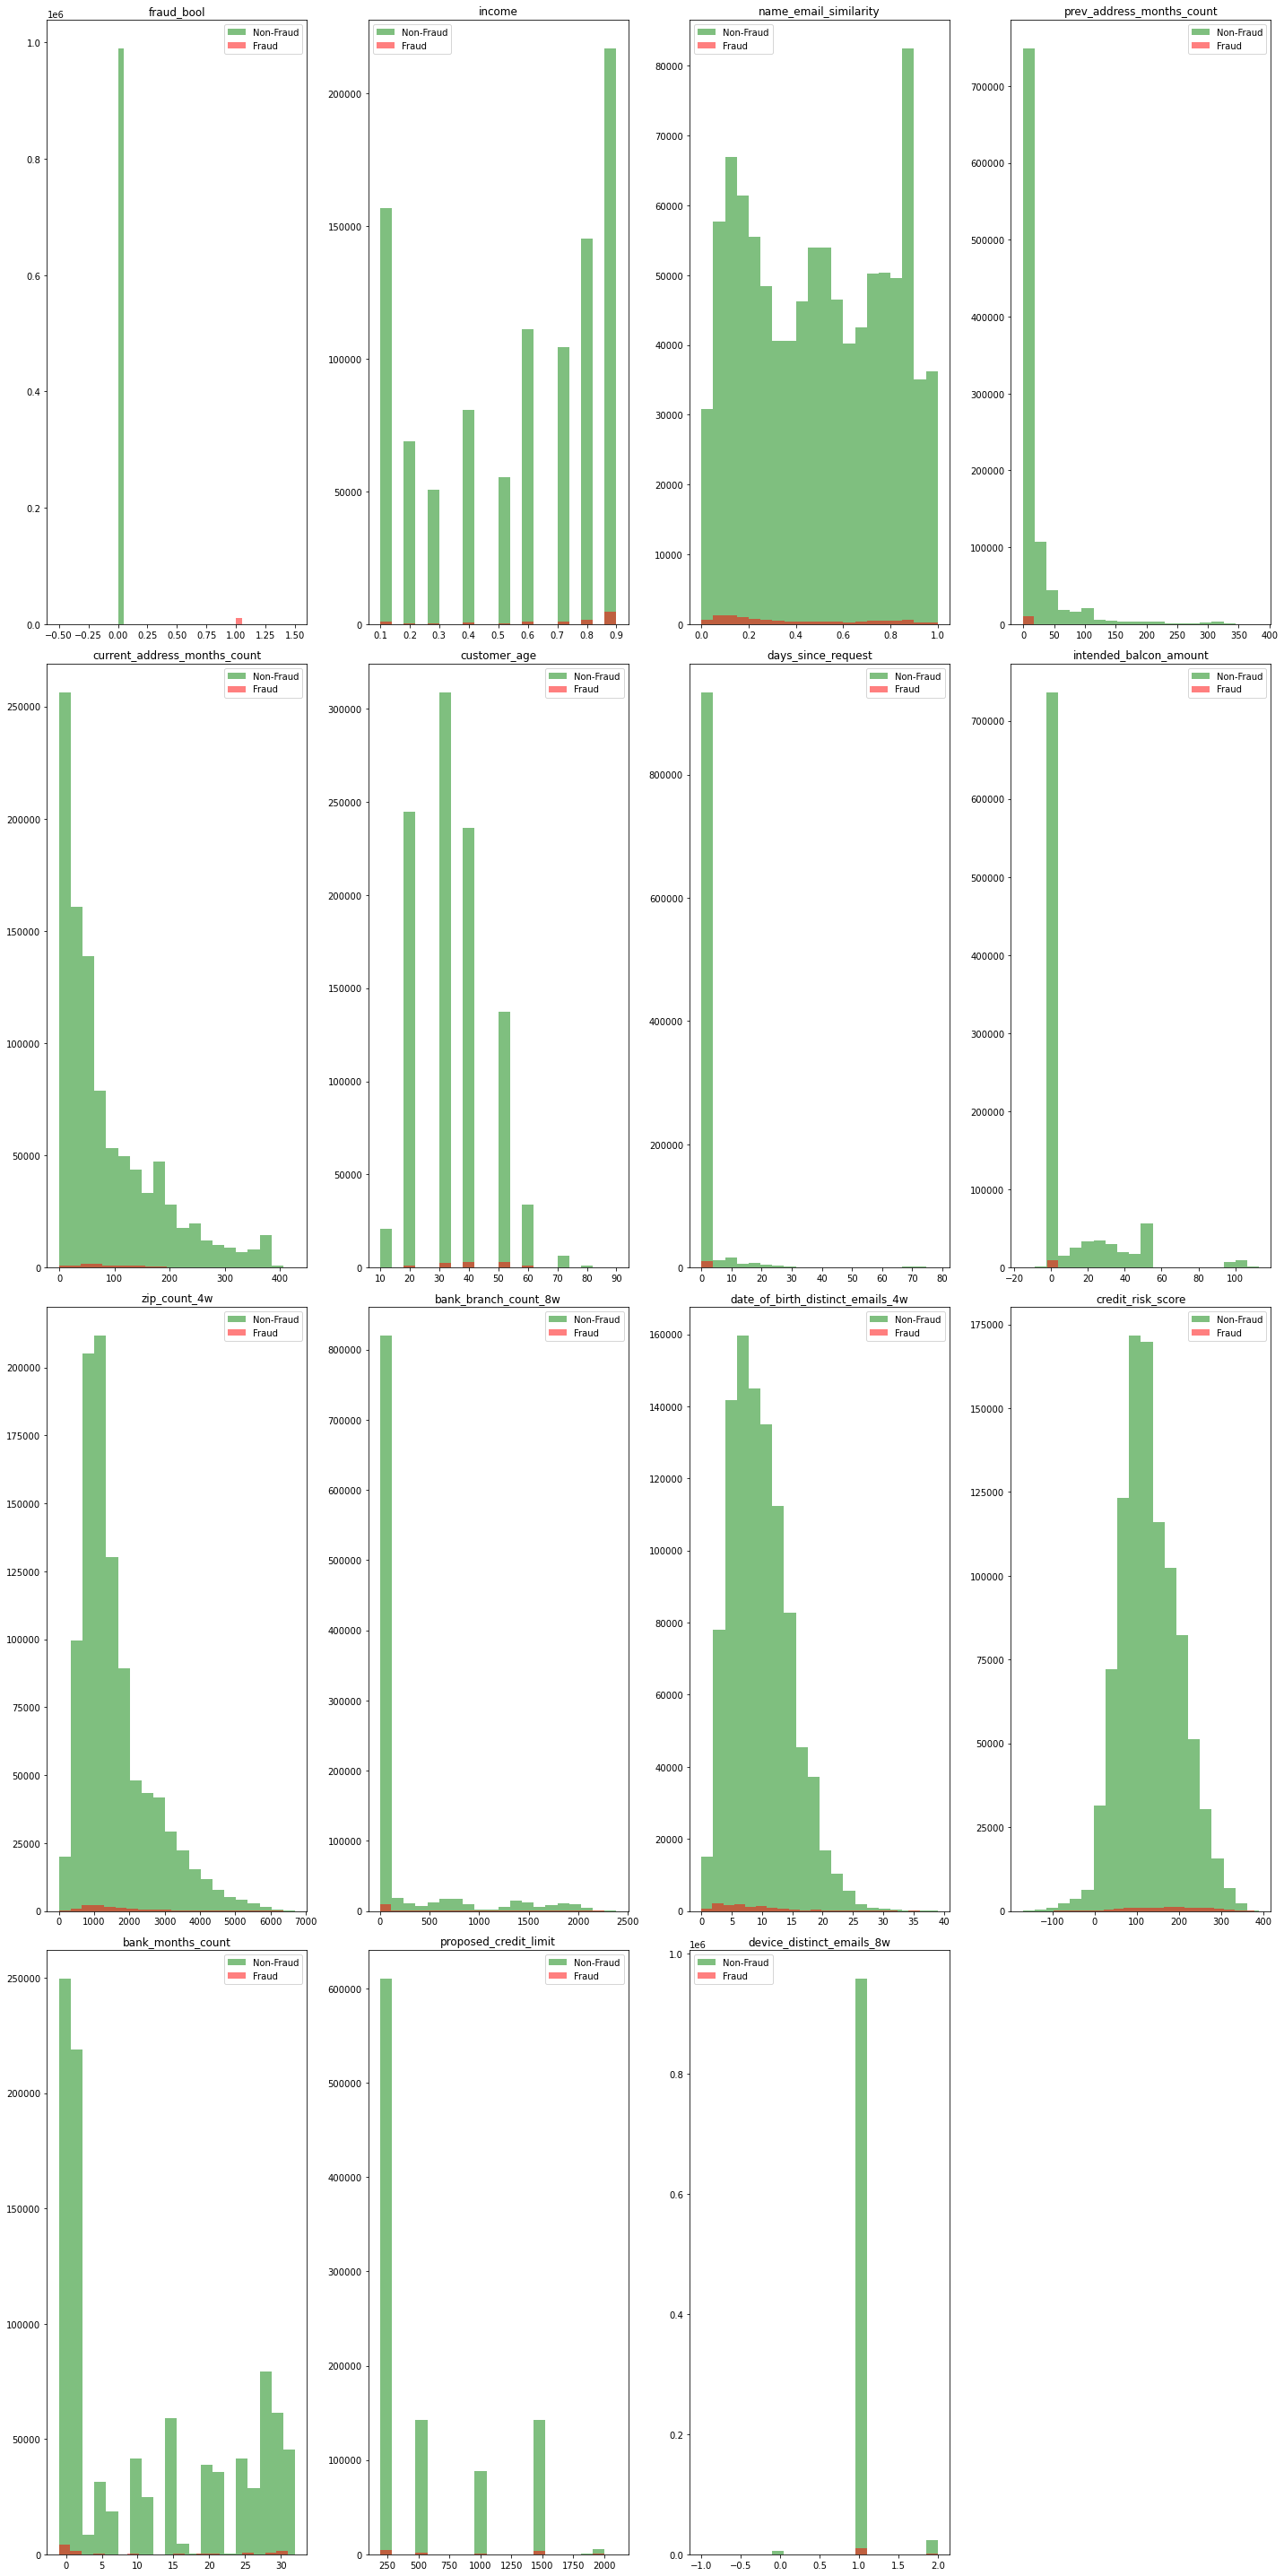

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables
numerical_features = [
            'fraud_bool',
            'income',
            'name_email_similarity',
            'prev_address_months_count',
            'current_address_months_count',
            'customer_age',
            'days_since_request',
            'intended_balcon_amount',
#             'payment_type',
            'zip_count_4w',
            'bank_branch_count_8w',
            'date_of_birth_distinct_emails_4w',
#             'employment_status',
            'credit_risk_score',
#             'email_is_free',
#             'housing_status',
#             'phone_home_valid',
#             'phone_mobile_valid',
            'bank_months_count', 
#             'has_other_cards',
            'proposed_credit_limit',
#             'foreign_request',
#             'source',
#             'device_os',
            'device_distinct_emails_8w',
#             'device_fraud_count'
                ]

n_cols = len(numerical_features)
cols_per_row = 4
rows = math.ceil(n_cols / cols_per_row)

fig, axs = plt.subplots(rows, cols_per_row, figsize=(20, 10 * rows), constrained_layout=True)

# Flatten the axes array for easy indexing
axs = axs.flatten()

for i, feature in enumerate(numerical_features):
    # Separate the data by fraud_bool status
    data_fraud = df[df['fraud_bool'] == 1][feature].dropna()
    data_non_fraud = df[df['fraud_bool'] == 0][feature].dropna()
    
    # Create histograms for each category within the same subplot
    axs[i].hist(data_non_fraud, bins=20, alpha=0.5, label='Non-Fraud', color='green')
    axs[i].hist(data_fraud, bins=20, alpha=0.5, label='Fraud', color='red')
    
    # Set the title and legend for the subplot
    axs[i].set_title(feature)
    axs[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)
    
plt.tight_layout()
plt.show()

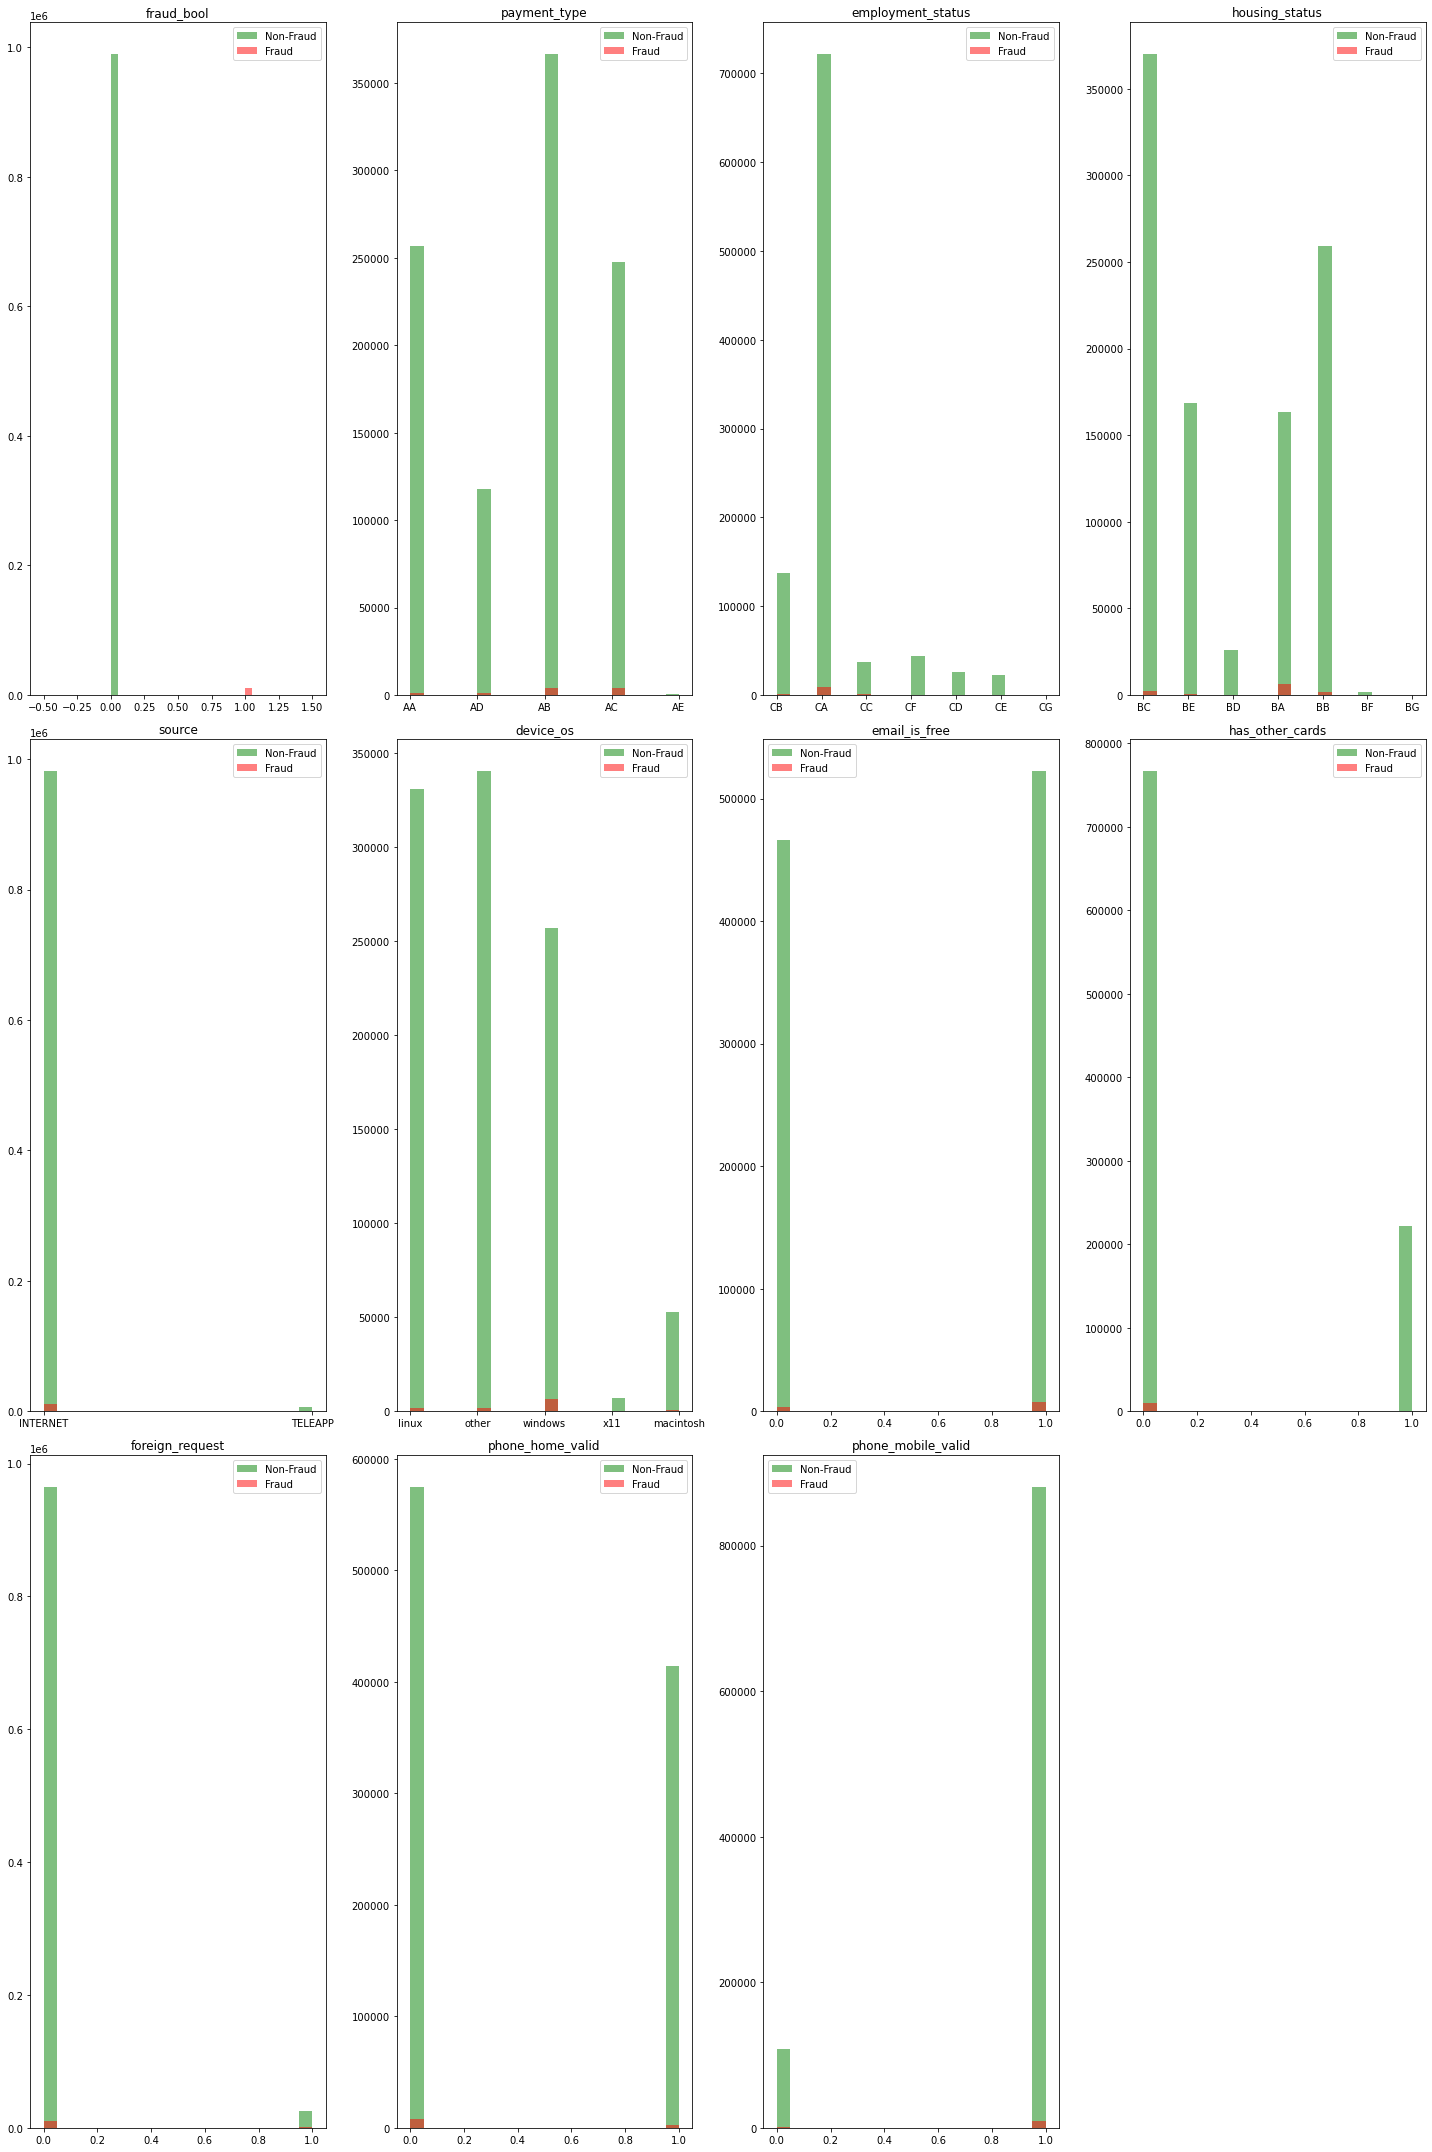

In [96]:
categorical_features = [
            'fraud_bool',
            'payment_type',
            'employment_status',
            'housing_status',
            'source',
            'device_os',
            'email_is_free',
            'has_other_cards',
            'foreign_request',
            'phone_home_valid',
            'phone_mobile_valid'
                ]

n_cols = len(categorical_features)
cols_per_row = 4
rows = math.ceil(n_cols / cols_per_row)

fig, axs = plt.subplots(rows, cols_per_row, figsize=(20, 10 * rows), constrained_layout=True)

axs = axs.flatten()

for i, feature in enumerate(categorical_features):
    # Separate the data by fraud_bool status
    data_fraud = df[df['fraud_bool'] == 1][feature].dropna()
    data_non_fraud = df[df['fraud_bool'] == 0][feature].dropna()
    
    # Create histograms for each category within the same subplot
    axs[i].hist(data_non_fraud, bins=20, alpha=0.5, label='Non-Fraud', color='green')
    axs[i].hist(data_fraud, bins=20, alpha=0.5, label='Fraud', color='red')
    
    # Set the title and legend for the subplot
    axs[i].set_title(feature)
    axs[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

# Data cleaning

## features with <0 values

In [120]:
df_fraud = df[df['fraud_bool']==1]
df_fraud.shape

(11029, 30)

In [121]:
numerical_features = [
#             'fraud_bool',
            'income',
            'name_email_similarity',
            'prev_address_months_count',
            'current_address_months_count',
            'customer_age',
            'days_since_request',
            'intended_balcon_amount',
#             'payment_type',
            'zip_count_4w',
            'bank_branch_count_8w',
            'date_of_birth_distinct_emails_4w',
#             'employment_status',
            'credit_risk_score',
#             'email_is_free',
#             'housing_status',
#             'phone_home_valid',
#             'phone_mobile_valid',
            'bank_months_count', 
#             'has_other_cards',
            'proposed_credit_limit',
#             'foreign_request',
#             'source',
#             'device_os',
            'device_distinct_emails_8w',
#             'device_fraud_count'
                ]

for col in numerical_features:
#     print(col, '\n')
    print(df_fraud[df_fraud[col]<0][col].value_counts())

Series([], Name: income, dtype: int64)
Series([], Name: name_email_similarity, dtype: int64)
-1    10134
Name: prev_address_months_count, dtype: int64
-1    14
Name: current_address_months_count, dtype: int64
Series([], Name: customer_age, dtype: int64)
Series([], Name: days_since_request, dtype: int64)
-1.480972    2
-1.244047    1
-0.956121    1
-0.915336    1
-1.024016    1
            ..
-1.055214    1
-3.283486    1
-0.669205    1
-0.799932    1
-0.480327    1
Name: intended_balcon_amount, Length: 9746, dtype: int64
Series([], Name: zip_count_4w, dtype: int64)
Series([], Name: bank_branch_count_8w, dtype: int64)
Series([], Name: date_of_birth_distinct_emails_4w, dtype: int64)
-9     3
-22    3
-25    3
-6     2
-40    2
-2     2
-54    2
-5     2
-26    2
-4     2
-34    1
-55    1
-41    1
-57    1
-48    1
-36    1
-85    1
-70    1
-60    1
-72    1
-78    1
-62    1
-29    1
-65    1
-21    1
-39    1
-97    1
-23    1
-24    1
-30    1
-7     1
-66    1
-20    1
-59    1
-87 

- prev_address_months_count, intended_balcon_amount, bank_months_count have substantial number of blanks
    - create feature to label blanks
- device_distinct_emails_8w, current_address_months_count very small number of blanks
    - leave them

# Feature Engineering

## features to label blanks

In [94]:
df['have_prev_address'] = np.where(df['prev_address_months_count']<0, 0, 1)

df['have_initial_bal'] = np.where(df['intended_balcon_amount']<=0, 0, 1)

df['have_bank_months_count'] = np.where(df['prev_address_months_count']<0, 0, 1)

## new features
     
- bank_integration = bank_months_count + has_other_cards*bank_months_count
    - if someone has alot of cards but bank_months_count low, might suggest a trustable relationship with a bank as Customers who are more integrated into a bank's ecosystem (reflected by has_other_cards) are less likely to jeopardize their relationship by committing fraud
    - hence, give higher weight to card amount. the higher the better
  
- income_credit_limit_ratio = income / proposed_credit_limit
    - the lower the higher chance of fraud

In [23]:
df['bank_integration'] = df['bank_months_count'] + df['has_other_cards']*df['bank_months_count']

df['income_credit_limit_ratio'] = df['income'] / df['proposed_credit_limit']

prev_address_months_count  have_prev_address  intended_balcon_amount  \
0                              -1                  0              102.453711   
1                              -1                  0               -0.849551   
2                               9                  1               -1.490386   
3                              11                  1               -1.863101   
4                              -1                  0               47.152498   
...                           ...                ...                     ...   
999995                         -1                  0               -0.826239   
999996                         -1                  0                0.008307   
999997                         -1                  0               50.609995   
999998                         52                  1               -1.313387   
999999                         -1                  0               14.942456   

        have_initial_bal  
0                      1  
1                      0  
2                      0  
3                      0  
4                      1  
...                  ...  
999995                 0  
999996                 1  
999997                 1  
999998                 0  
999999                 1  

[1000000 rows x 4 columns]

# MCA to select categorical features
- will make dummy variables out of have_initial_bal and have_prev_address as those seems to be significant

In [97]:
df_fraud = df[df['fraud_bool']==1]
df_fraud.shape

(11029, 30)

In [31]:
categorical_features = [
                         'payment_type',
                         'employment_status',
                         'housing_status',
                         'source',
                         'device_os',
                         'email_is_free',
                         'has_other_cards',
                         'foreign_request',
                         'phone_home_valid',
                         'phone_mobile_valid']

In [103]:
for col in categorical_features:
    print(df_fraud[col].value_counts())

1    11029
Name: fraud_bool, dtype: int64
AC    4209
AB    4169
AA    1364
AD    1286
AE       1
Name: payment_type, dtype: int64
CA    8899
CB     953
CC     932
CD     100
CF      85
CE      53
CG       7
Name: employment_status, dtype: int64
BA    6357
BC    2288
BB    1568
BE     582
BD     226
BF       7
BG       1
Name: housing_status, dtype: int64
INTERNET    10917
TELEAPP       112
Name: source, dtype: int64
windows      6507
other        1974
linux        1715
macintosh     752
x11            81
Name: device_os, dtype: int64
1    7291
0    3738
Name: email_is_free, dtype: int64
0    10098
1      931
Name: has_other_cards, dtype: int64
0    10474
1      555
Name: foreign_request, dtype: int64
0    8238
1    2791
Name: phone_home_valid, dtype: int64
1    9381
0    1648
Name: phone_mobile_valid, dtype: int64


**Remove source as basically only has one value**

In [ ]:
categorical_features = [
                         'payment_type',
                         'employment_status',
                         'housing_status',
#                          'source',
                         'device_os',
                         'email_is_free',
                         'has_other_cards',
                         'foreign_request',
                         'phone_home_valid',
                         'phone_mobile_valid']

In [30]:
# !pip install prince

In [32]:
# import prince

# mca = prince.MCA()

# mca = mca.fit(df[categorical_features]) 
# mca = mca.transform(df[categorical_features])
# print(mca)


               0         1
0      -0.383053 -0.276383
1      -0.185395 -0.066242
2      -0.147558 -0.258668
3      -0.180871 -0.553438
4      -0.234728  0.422581
...          ...       ...
999995  0.293136 -0.110415
999996  0.050692  0.553457
999997 -0.681542  0.209587
999998 -0.112064 -0.267685
999999 -0.161877  0.049101

[1000000 rows x 2 columns]


In [112]:
cluster_features = [
            'fraud_bool',
            'income',
            'name_email_similarity',
            'current_address_months_count',
            'customer_age',
            'days_since_request',
            'payment_type',
            'zip_count_4w',
            'bank_branch_count_8w',
            'date_of_birth_distinct_emails_4w',
            'employment_status',
            'credit_risk_score',
            'email_is_free',
            'housing_status',
            'phone_home_valid',
            'phone_mobile_valid',
            'bank_months_count', 'have_bank_months_count',
            'has_other_cards',
            'proposed_credit_limit',
            'foreign_request',
            'device_os',
            'device_distinct_emails_8w',
            'bank_integration',
            'income_credit_limit_ratio',
            'have_prev_address',
            'have_initial_bal'
                ]

In [113]:
# df_mca = pd.concat([df[cluster_features], mca], axis=1)
# df_mca.rename(columns = {0:'mca1', 1:'mca2'}, inplace=True)

In [34]:
# df_mca.head()

fraud_bool  income  name_email_similarity  customer_age  \
0           0     0.3               0.986506            40   
1           0     0.8               0.617426            20   
2           0     0.8               0.996707            40   
3           0     0.6               0.475100            30   
4           0     0.9               0.842307            40   

   days_since_request  intended_balcon_amount  zip_count_4w  \
0            0.006735              102.453711          1059   
1            0.010095               -0.849551          1658   
2            0.012316               -1.490386          1095   
3            0.006991               -1.863101          3483   
4            5.742626               47.152498          2339   

   bank_branch_count_8w  date_of_birth_distinct_emails_4w  credit_risk_score  \
0                     5                                 5                163   
1                     3                                18                154   
2                    15                                11                 89   
3                    11                                13                 90   
4                     1                                 6                 91   

   bank_months_count  proposed_credit_limit  device_distinct_emails_8w  \
0                  9                 1500.0                          1   
1                  2                 1500.0                          1   
2                 30                  200.0                          1   
3                  1                  200.0                          1   
4                 26                  200.0                          1   

   bank_integration  income_credit_limit_ratio  have_prev_address  \
0                 9                   0.000200                  0   
1                 2                   0.000533                  0   
2                30                   0.004000                  1   
3                 1                   0.003000                  1   
4                26                   0.004500                  0   

   have_initial_bal      mca1      mca2  
0                 1 -0.383053 -0.276383  
1                 0 -0.185395 -0.066242  
2                 0 -0.147558 -0.258668  
3                 0 -0.180871 -0.553438  
4                 1 -0.234728  0.422581

In [35]:
# df_mca.columns

Index(['fraud_bool', 'income', 'name_email_similarity', 'customer_age',
       'days_since_request', 'intended_balcon_amount', 'zip_count_4w',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'bank_months_count', 'proposed_credit_limit',
       'device_distinct_emails_8w', 'bank_integration',
       'income_credit_limit_ratio', 'have_prev_address', 'have_initial_bal',
       'mca1', 'mca2'],
      dtype='object')

# Undersampling

## Cluster Centroid undersampling - too long 

In [36]:
# from sklearn.model_selection import train_test_split

# X = df_mca.drop('fraud_bool', axis=1)
# y = df_mca['fraud_bool']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# y_train.value_counts()

In [37]:
# !pip install imblearn

In [38]:
# from imblearn.under_sampling import ClusterCentroids

# undersampler = ClusterCentroids()

# X_smote, y_smote = undersampler.fit_resample(X_train, y_train)

# y_smote.value_counts()

## Random Undersampling
- choose 1:5 ratio as it is a good balance to view better separation btw fraud and non-fraud cases, as well as not lose too much information
- 1:5 ratio seems to mimic original distribution as well

## with MCA

In [39]:
# !pip uninstall scikit-learn --yes

In [54]:
# from imblearn.under_sampling import RandomUnderSampler
# # from sklearn import _MissingValues

# X = df_mca.drop('fraud_bool', axis=1)
# y = df_mca['fraud_bool']

# undersample = RandomUnderSampler(sampling_strategy=0.2)
# X_over, y_over = undersample.fit_resample(X, y)

# y_over.value_counts()

0    55145
1    11029
Name: fraud_bool, dtype: int64

## without MCA

In [114]:
df2 = df[cluster_features]

In [115]:
from imblearn.under_sampling import RandomUnderSampler
# from sklearn import _MissingValues

X = df2.drop('fraud_bool', axis=1)
y = df2['fraud_bool']

undersample = RandomUnderSampler(sampling_strategy=0.2)
X_over, y_over = undersample.fit_resample(X, y)

y_over.value_counts()

0    55145
1    11029
Name: fraud_bool, dtype: int64

In [116]:
df_cluster = X_over
df_cluster['fraud_bool'] = y_over
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66174 entries, 888601 to 999974
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   income                            66174 non-null  float64
 1   name_email_similarity             66174 non-null  float64
 2   current_address_months_count      66174 non-null  int64  
 3   customer_age                      66174 non-null  int64  
 4   days_since_request                66174 non-null  float64
 5   payment_type                      66174 non-null  object 
 6   zip_count_4w                      66174 non-null  int64  
 7   bank_branch_count_8w              66174 non-null  int64  
 8   date_of_birth_distinct_emails_4w  66174 non-null  int64  
 9   employment_status                 66174 non-null  object 
 10  credit_risk_score                 66174 non-null  int64  
 11  email_is_free                     66174 non-null  int64  
 12

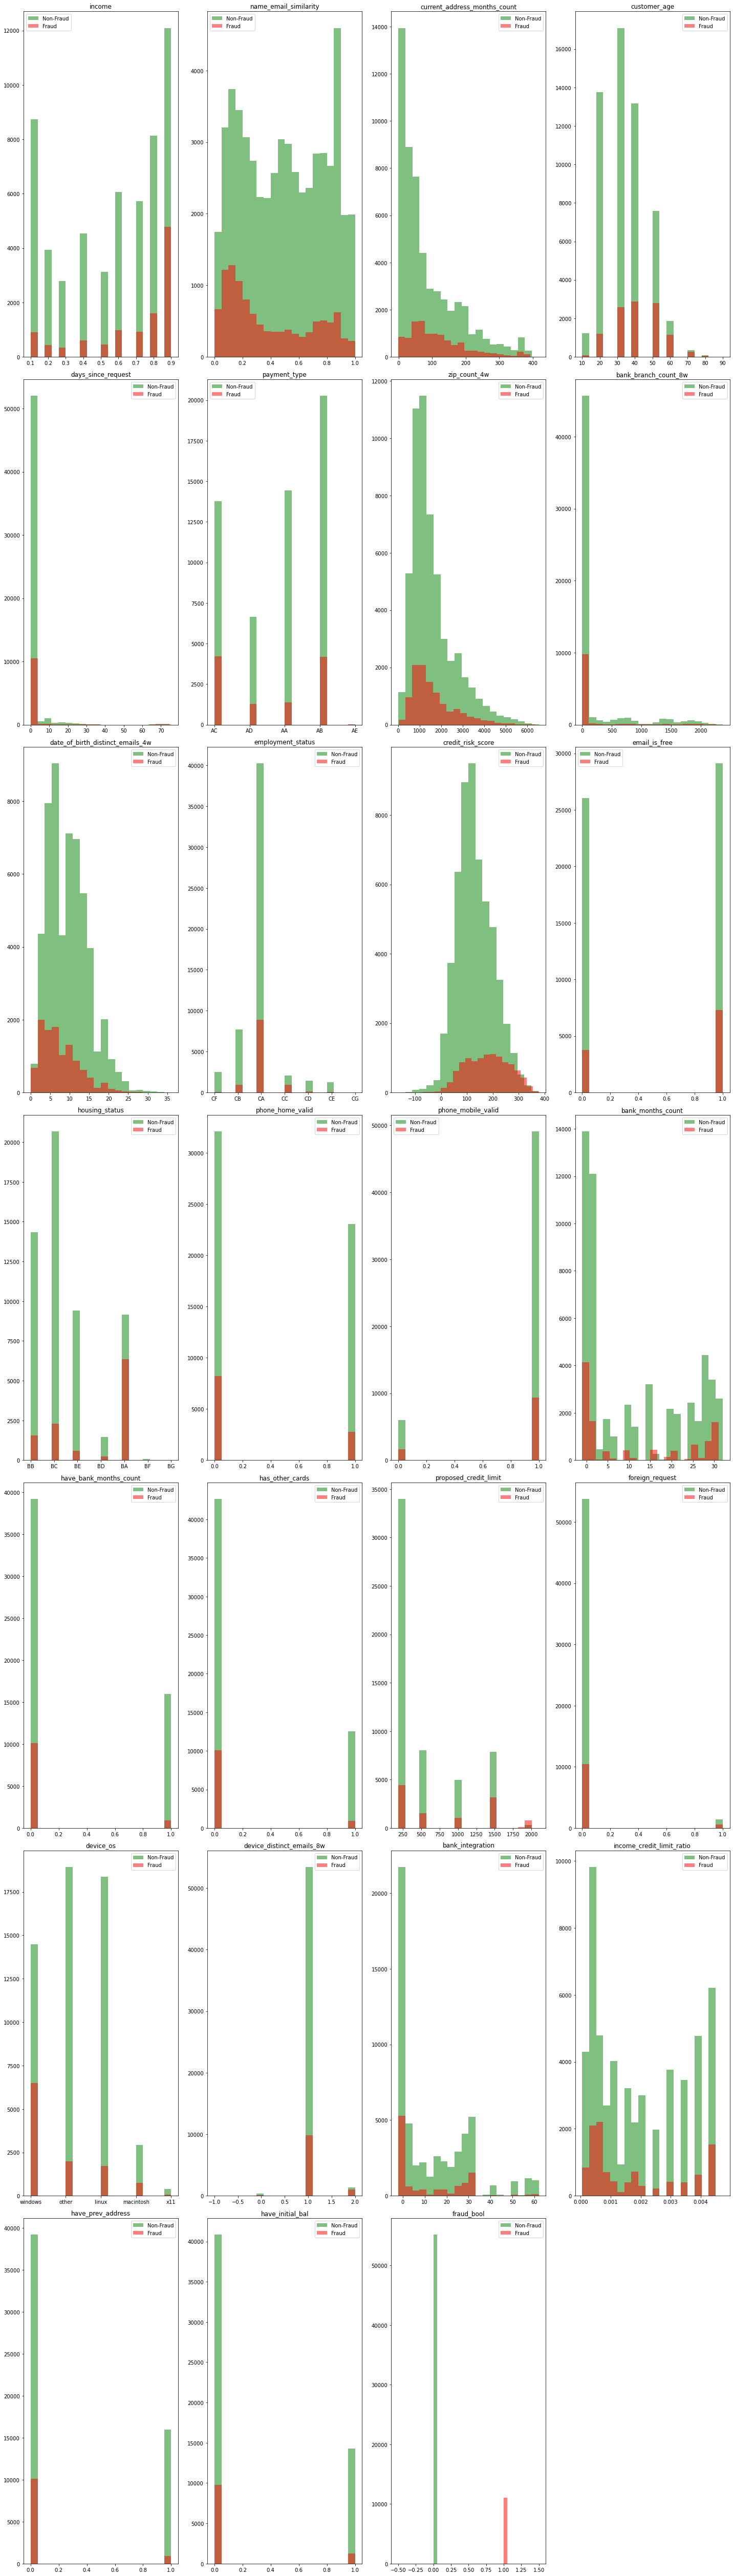

In [117]:
n_cols = len(df_cluster.columns)
cols_per_row = 4
rows = math.ceil(n_cols / cols_per_row)

fig, axs = plt.subplots(rows, cols_per_row, figsize=(20, 10 * rows), constrained_layout=True)

# Flatten the axes array for easy indexing
axs = axs.flatten()

for i, feature in enumerate(df_cluster.columns):
    # Separate the data by fraud_bool status
    data_fraud = df_cluster[df_cluster['fraud_bool'] == 1][feature].dropna()
    data_non_fraud = df_cluster[df_cluster['fraud_bool'] == 0][feature].dropna()
    
    # Create histograms for each category within the same subplot
    axs[i].hist(data_non_fraud, bins=20, alpha=0.5, label='Non-Fraud', color='green')
    axs[i].hist(data_fraud, bins=20, alpha=0.5, label='Fraud', color='red')
    
    # Set the title and legend for the subplot
    axs[i].set_title(feature)
    axs[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

In [118]:
df_cluster.head()

income  name_email_similarity  current_address_months_count  \
888601     0.2               0.237057                            25   
54117      0.9               0.841858                            14   
843994     0.6               0.687026                           194   
542129     0.6               0.739344                            11   
311971     0.1               0.872682                            35   

        customer_age  days_since_request payment_type  zip_count_4w  \
888601            50            0.014924           AC          1102   
54117             30            0.024327           AC          1090   
843994            30            0.001801           AD           479   
542129            20            7.691285           AA          2190   
311971            20            0.027091           AC          2628   

        bank_branch_count_8w  date_of_birth_distinct_emails_4w  \
888601                     0                                 5   
54117                      0                                18   
843994                     4                                 2   
542129                   379                                11   
311971                     6                                11   

       employment_status  credit_risk_score  email_is_free housing_status  \
888601                CF                121              1             BB   
54117                 CB                 46              1             BC   
843994                CF                192              0             BB   
542129                CA                104              1             BB   
311971                CA                214              0             BE   

        phone_home_valid  phone_mobile_valid  bank_months_count  \
888601                 0                   1                 -1   
54117                  0                   1                 -1   
843994                 0                   1                 10   
542129                 0                   1                 22   
311971                 0                   1                 -1   

        have_bank_months_count  has_other_cards  proposed_credit_limit  \
888601                       0                0                  200.0   
54117                        1                0                  200.0   
843994                       0                0                 1000.0   
542129                       1                0                  200.0   
311971                       0                0                 1000.0   

        foreign_request  device_os  device_distinct_emails_8w  \
888601                0    windows                          1   
54117                 0      other                          1   
843994                0      linux                          1   
542129                0      other                          1   
311971                0  macintosh                          1   

        bank_integration  income_credit_limit_ratio  have_prev_address  \
888601                -1                     0.0010                  0   
54117                 -1                     0.0045                  1   
843994                10                     0.0006                  0   
542129                22                     0.0030                  1   
311971                -1                     0.0001                  0   

        have_initial_bal  fraud_bool  
888601                 0           0  
54117                  0           0  
843994                 0           0  
542129                 1           0  
311971                 0           0

In [58]:
# df_cluster.to_csv('undersampled_mca_data.csv', index=False)

# standardize numerical features

In [124]:
numerical_features = [
#             'fraud_bool',
            'income',
            'name_email_similarity',
            'current_address_months_count',
            'customer_age',
            'days_since_request',
#             'payment_type',
            'zip_count_4w',
            'bank_branch_count_8w',
            'date_of_birth_distinct_emails_4w',
#             'employment_status',
            'credit_risk_score',
#             'email_is_free',
#             'housing_status',
#             'phone_home_valid',
#             'phone_mobile_valid',
            'bank_months_count', 
#             'has_other_cards',
            'proposed_credit_limit',
#             'foreign_request',
#             'device_os',
            'device_distinct_emails_8w',
            'bank_integration',
            'income_credit_limit_ratio',
#             'have_prev_address',
#             'have_initial_bal'
#             'have_bank_months_count',
                ]

In [125]:
df_scaled = df_cluster

for col in numerical_features:
    df_scaled[col] = (df_scaled[col] - df_scaled[col].mean()) / df_scaled[col].std() 

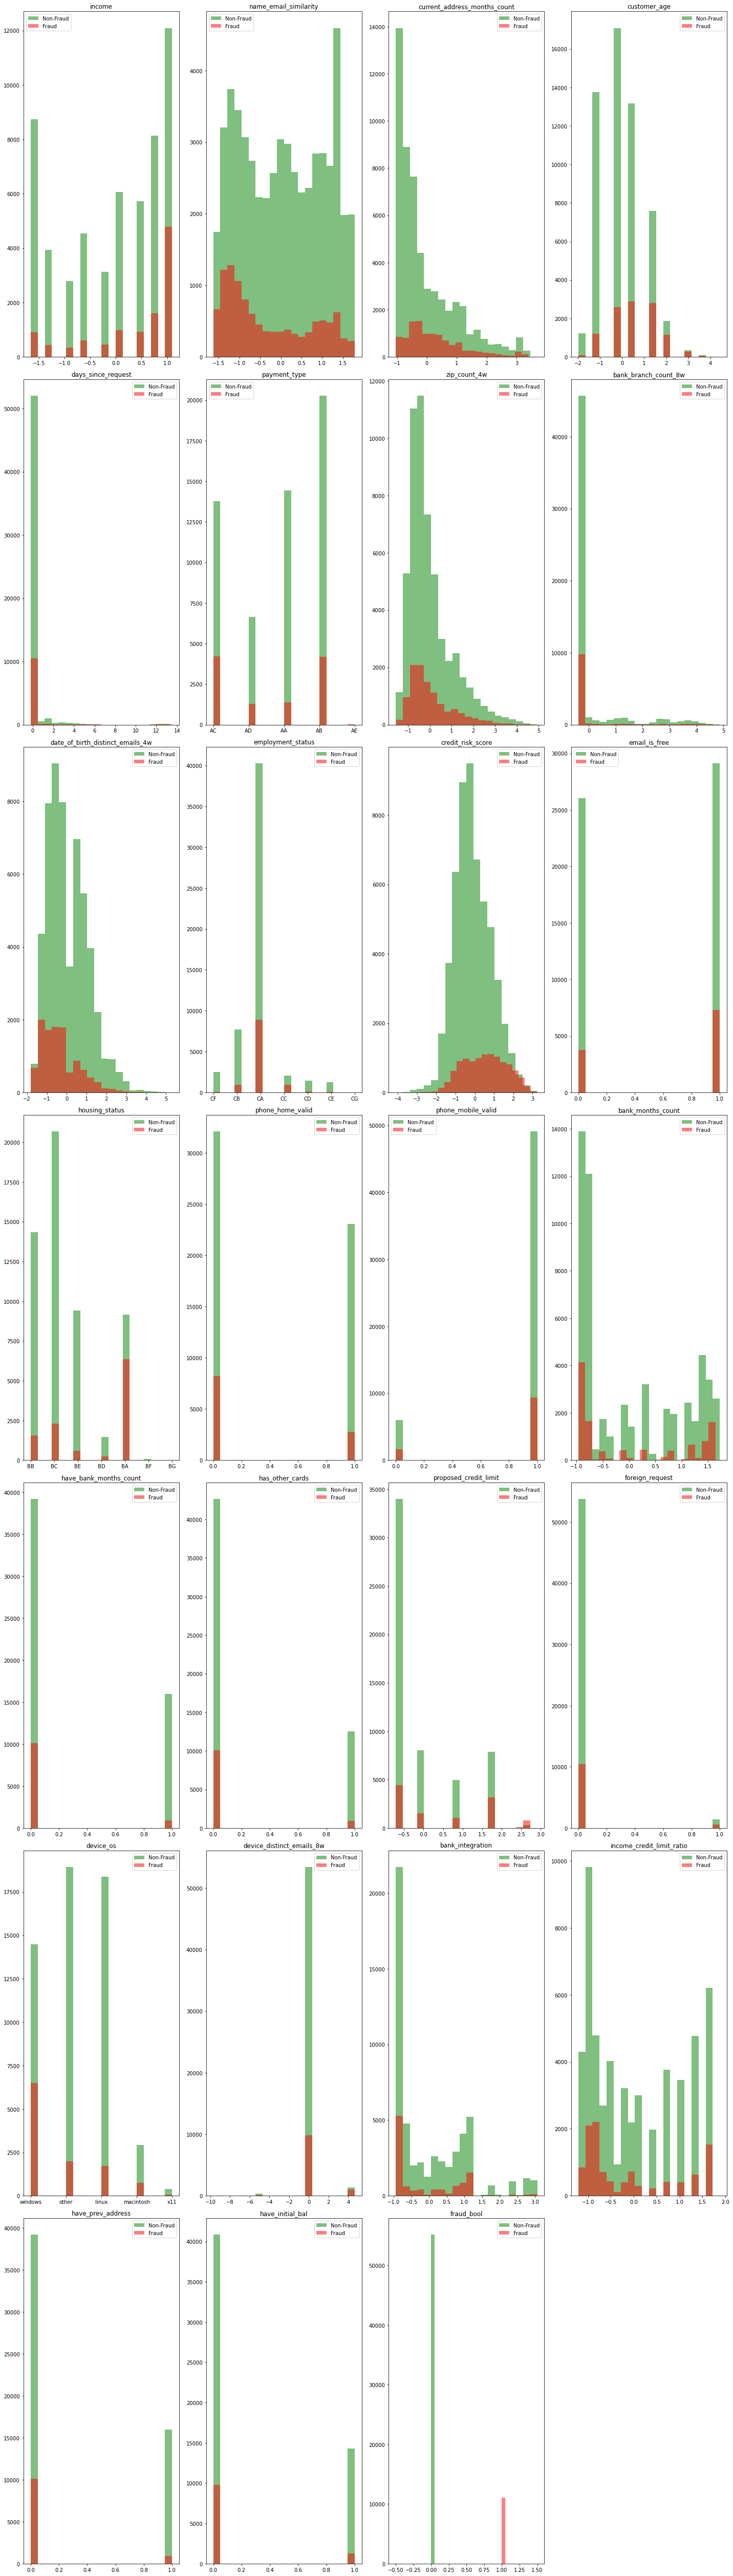

In [126]:
n_cols = len(df_scaled.columns)
cols_per_row = 4
rows = math.ceil(n_cols / cols_per_row)

fig, axs = plt.subplots(rows, cols_per_row, figsize=(20, 10 * rows), constrained_layout=True)

# Flatten the axes array for easy indexing
axs = axs.flatten()

for i, feature in enumerate(df_scaled.columns):
    # Separate the data by fraud_bool status
    data_fraud = df_scaled[df_scaled['fraud_bool'] == 1][feature].dropna()
    data_non_fraud = df_scaled[df_scaled['fraud_bool'] == 0][feature].dropna()
    
    # Create histograms for each category within the same subplot
    axs[i].hist(data_non_fraud, bins=20, alpha=0.5, label='Non-Fraud', color='green')
    axs[i].hist(data_fraud, bins=20, alpha=0.5, label='Fraud', color='red')
    
    # Set the title and legend for the subplot
    axs[i].set_title(feature)
    axs[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

In [127]:
df_scaled.to_csv('undersampled_mca_scaled_data.csv', index=False)